<a href="https://colab.research.google.com/github/Aatmaj-Zephyr/Machine-Learning-Lab/blob/main/Exp%201/Exploration%20of%20Python%20Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exp1- Exploration of python libraries

#### scikit-learn

Machine learining package that provides basic ML algorithms like regresion, clustering, SVM, naive bayes etc.


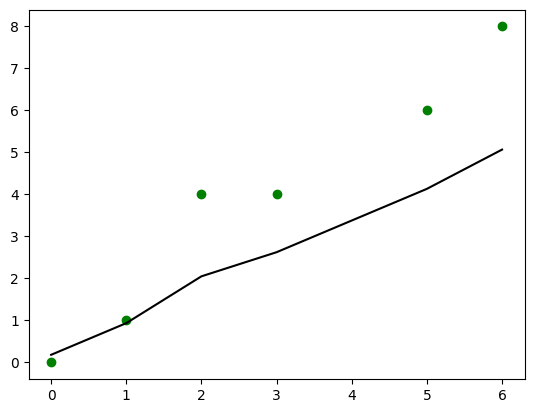

In [ ]:
from sklearn import linear_model
from matplotlib import pyplot as plt
reg = linear_model.LinearRegression()
x= [[0, 0], [1, 1], [2, 4],[3,4],[5,6],[6,8]]
y=[0,1,2,3,4,5]
reg.fit(x, y)
y_pred = reg.predict(x)
plt.scatter(*zip(*x),color='g')
plt.plot([item[0] for item in x], y_pred, color='k')
plt.show()



#### Tensorflow & Keras
Tensorflow is a machine learning - deep learning library. TensorFlow operates on multidimensional arrays or tensors represented as tf.Tensor objects. Keras is the high-level API of the TensorFlow platform

###### What are tensors?
Tensorflow is based on tensors.
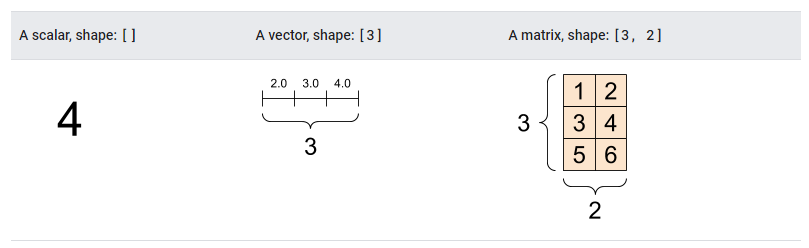

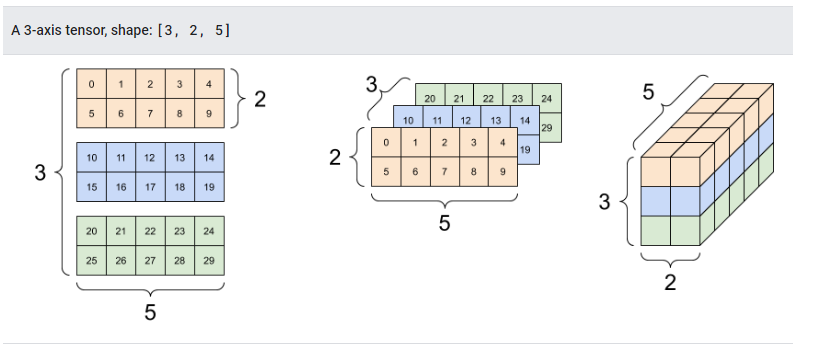

Tensors are multi-dimensional arrays with a uniform type. Just like numpy arrays.



In [ ]:
import tensorflow as tf
tf.constant([2.0, 3.0, 4.0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

#### PyTorch
PyTorch provides array operations on GPU

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=4)
test_dataloader = DataLoader(test_data, batch_size=4)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

  # Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 32),
            nn.Linear(32, 16),
            nn.Linear(16, 16),
            nn.Linear(16, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

epochs = 1
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Shape of X [N, C, H, W]: torch.Size([4, 1, 28, 28])
Shape of y: torch.Size([4]) torch.int64
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): Linear(in_features=32, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.382509  [    4/60000]
loss: 2.108972  [  404/60000]
loss: 2.032995  [  804/60000]
loss: 1.708073  [ 1204/60000]
loss: 1.467194  [ 1604/60000]
loss: 1.076803  [ 2004/60000]
loss: 1.238009  [ 2404/60000]
loss: 1.029497  [ 2804/60000]
loss: 1.122000  [ 3204/60000]
loss: 1.235013  [ 3604/60000]
loss: 0.700047  [ 4004/60000]
loss: 1.209697  [ 4404/60000]
loss: 0.984240  [ 4804/60000]
loss: 0.561886  [ 5204/60000]
loss: 0.989279  [ 5604/60000]
loss: 1.690722  [ 6004/60000]
loss: 0.912187  [ 6404/60000

#### Pandas
Pandas is used to clean and manipulate tabular data

In [ ]:
import pandas as pd
url = (
    "https://raw.githubusercontent.com/pandas-dev"
    "/pandas/main/pandas/tests/io/data/csv/tips.csv"
)
tips = pd.read_csv(url)
tips
tips[["total_bill", "tip", "smoker", "time"]]

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner
...,...,...,...,...
239,29.03,5.92,No,Dinner
240,27.18,2.00,Yes,Dinner
241,22.67,2.00,Yes,Dinner
242,17.82,1.75,No,Dinner


from matplotlib import pyplot as plt
_df_0['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tip'].plot(kind='hist', bins=20, title='tip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoker')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['tip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoker')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('tip')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['tip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('tip')

from matplotlib import pyplot as plt
_df_9['total_bill'].plot(kind='line', figsize=(8, 4), title='total_bill')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['tip'].plot(kind='line', figsize=(8, 4), title='tip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time'].value_counts()
    for x_label, grp in _df_11.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('time')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='total_bill', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='total_bill', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='tip', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='tip', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

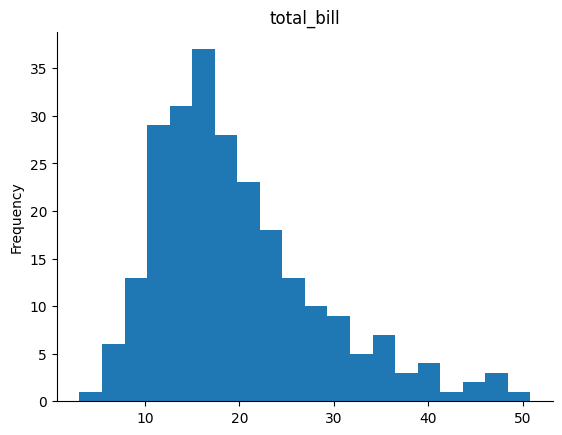

In [ ]:
from matplotlib import pyplot as plt
_df_0['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)